In [57]:
! pip install --upgrade --user geopandas fiona

  Using cached https://files.pythonhosted.org/packages/83/c5/3cf9cdc39a6f2552922f79915f36b45a95b71fd343cfc51170a5b6ddb6e8/geopandas-0.7.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/7d/a1/5c945c1751d926b203bd46ea9b0f0631ccf6797b58dafd1a97592ecbc7bb/Fiona-1.8.13.post1-cp37-cp37m-manylinux1_x86_64.whl
  Found existing installation: Fiona 1.8.8
    Uninstalling Fiona-1.8.8:
      Successfully uninstalled Fiona-1.8.8
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Found existing installation: geopandas 0.6.0
    Uninstalling geopandas-0.6.0:
      Successfully uninstalled geopandas-0.6.0


In [22]:
import geopandas as gp 
import pandas as pd
from shapely.geometry import Point
from pathlib import Path
from zipfile import ZipFile
import matplotlib.pyplot as plt
import json

In [16]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)

## Hard to count 

In [4]:
htc_data = pd.read_excel('data/hard_to_count/pdb2015tract_2010MRR_2017ACS_NY.xlsx', skiprows=5, dtype={'GEOIDtxt' : 'str'})

In [6]:
htc_data2 = pd.read_excel('data/hard_to_count/pdb2017tract_2010MRR_2018ACS_NY.xlsx', skiprows=5, dtype={'GEOIDtxt' : 'str'})

In [35]:
tracts = gp.read_file('data/hard_to_count/tl_2018_36_tract.shp')

In [4]:
htc_data[htc_data.Stusps10=='NY'].to_csv('data/hard_to_count_NY.csv', index=False)

In [9]:
htc_data2.head()

,GEOIDtxt,StateFIPS,StateAbb,StateName,CountyFIPS,CountyName,TractFIPS,MailReturnRateCen2010,LowResponseScore,TotPop,...,Moved90to99,Moved1989earlier,IntFirstEng,IntFirstBiling,IntChoiceEng,IntChoiceBiling,MailTypeNotKnown,UpdateEnumerate,RemoteAlaska,UpdateLeave
0,36001000100,36,NY,New York,1,Albany County,1.00,67.9,30.2,2022,...,80,82,957.000,0.0,0.0,0.0,0,0,0,0.000
1,36001000200,36,NY,New York,1,Albany County,2.00,60.4,34.3,4700,...,171,76,0.000,0.0,2978.0,0.0,0,0,0,0.000
2,36001000300,36,NY,New York,1,Albany County,3.00,73.0,26.9,5966,...,327,357,2681.176,0.0,0.0,0.0,0,0,0,226.824
3,36001000401,36,NY,New York,1,Albany County,4.01,88.1,13.5,2479,...,28,139,1131.000,0.0,0.0,0.0,0,0,0,0.000
4,36001000403,36,NY,New York,1,Albany County,4.03,76.9,22.7,4236,...,196,211,2472.000,0.0,0.0,0.0,0,0,0,0.000


In [18]:
100 -26.3

73.7

In [ ]:
htc_data2[ (htc_data2.StateAbb=='NY') & (htc_data2.CountyName =='Kings County')]

In [19]:
100-26.3

73.7

In [53]:
htc_data[ (htc_data.Stusps10=='NY') & (htc_data.Tract10 ==205)].iloc[0]

GEOID                                36047020500
GEOIDtxt                             36047020500
State                                         36
Stusps10                                      NY
State_name                              New York
County10                                      47
County_name10                       Kings County
Tract10                                      205
MRR2010                                     75.3
MRR20pctthreshold                              0
UE_flag                                        0
HTCcomboflag                                   0
TotPopACS17                                 2907
TotPopinHHs                                 2893
GroupQuarterACS17                             14
TotUnder5                                    209
Hispanic                                     119
BlackAloneOrCombo                            836
AmerIndAloneorCombo                           69
AsianAloneOrCombo                            401
NatHawAloneOrCombo  

In [5]:
pd.merge(tracts,htc_data,left_on='GEOID',right_on='GEOIDtxt')

,STATEFP,COUNTYFP,TRACTCE,GEOID_x,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,Internet,DialUpOnly,Broadband_Any,Cellular,CellularOnly,Broadband_CableFiberOpticDSL,Broadband_CableFiberOpticDSLOnly,Satellite,SatelliteOnly,OtherOnly
0,36,007,012702,36007012702,127.02,Census Tract 127.02,G5020,S,65411230,228281,...,1682,11,1671,964,107,1528,647,85,26,10
1,36,007,012800,36007012800,128,Census Tract 128,G5020,S,12342855,259439,...,1718,3,1715,832,62,1635,877,31,0,0
2,36,007,012900,36007012900,129,Census Tract 129,G5020,S,14480253,63649,...,473,5,468,280,20,438,183,18,5,0
3,36,007,013000,36007013000,130,Census Tract 130,G5020,S,9934434,381729,...,1425,15,1410,739,65,1338,671,16,0,0
4,36,007,013202,36007013202,132.02,Census Tract 132.02,G5020,S,2451349,3681,...,1081,0,1081,578,57,990,449,48,34,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4907,36,027,640002,36027640002,6400.02,Census Tract 6400.02,G5020,S,2304853,13876,...,24,0,24,12,0,24,8,4,0,0
4908,36,027,130004,36027130004,1300.04,Census Tract 1300.04,G5020,S,24394743,363637,...,529,11,518,348,3,507,165,17,0,0
4909,36,027,050104,36027050104,501.04,Census Tract 501.04,G5020,S,25446931,234551,...,1972,0,1972,1138,38,1934,684,42,0,0
4910,36,119,014500,36119014500,145,Census Tract 145,G5020,S,2778952,14648,...,1767,0,1767,1044,66,1701,723,15,0,0


## Facilities

In [220]:
with ZipFile('data/facilities_201912.csv.zip') as zf:
    facilities  = pd.read_csv(zf.open('facilities_201912.csv'), dtype={'censtract' :'str'})

In [221]:
types=['DAY CARE','EARLY EDUCATION PROGRAM','AFTERSCHOOL PROGRAMS', 'ELEMENTARY SCHOOL - NON-PUBLIC', 'RESIDENTIAL MENTAL HEALTH',
       'ELEMENTARY SCHOOL - PUBLIC','FOOD PANTRY']

facilities =facilities[facilities.factype.isin(types)]
facilities.shape

(6245, 37)

In [222]:
facility_cols = ['facname', 'addressnum', 'streetname', 'address', 'city', 'zipcode',
       'boro', 'borocode', 'bin', 'bbl', 'commboard', 'nta', 'council',
       'schooldist', 'censtract', 'factype','capacity', 'geometry',
       'uid']

In [223]:
facilities_geo = gp.GeoDataFrame(facilities,geometry = facilities.apply(lambda x: Point(x.longitude,x.latitude),axis=1), crs={'init':'EPSG:4326'})
facilities_geo = gp.GeoDataFrame(facilities_geo[facility_cols])


JOIN THESE WITH CENSUS TRACTS AT BOTTOM TO GET PROPER GEOID

In [224]:
facilities[facility_cols + ["latitude","longitude"]].to_csv('../public/facilities.csv', index=False)

In [225]:
facilities.censtract

1           NaN
2        018100
3           NaN
4           NaN
5           NaN
          ...  
34247    023600
34249    025100
34251    009400
34258    039800
34270       NaN
Name: censtract, Length: 6245, dtype: object

## Mail Strategies

In [10]:
mail_strategy_data = pd.read_excel('data/2020-mail-strategies-by-tract.xlsx')

In [11]:
mail_strategy_data.BCUSTATEFP.value_counts().sort_index()


1     1173
2      119
4     1463
5      686
6     7987
8     1233
9      828
10     214
11     179
12    4174
13    1949
15     295
16     295
17    3116
18    1507
19     823
20     765
21    1095
22    1124
23     351
24    1387
25    1468
26    2759
27    1330
28     659
29    1390
30     260
31     528
32     675
33     294
34    1998
35     467
36    4874
37    2160
38     197
39    2943
40    1029
41     825
42    3209
44     240
45    1087
46     203
47    1488
48    5213
49     578
50     183
51    1879
53    1436
54     463
55    1393
56     124
Name: BCUSTATEFP, dtype: int64

In [12]:
mail_strategy_data.LANGUAGE.value_counts()

0    64378
1     7737
Name: LANGUAGE, dtype: int64

In [13]:
new_york_mail_strategy = mail_strategy_data[mail_strategy_data.BCUSTATEFP==36]

In [14]:
new_york_mail_strategy

,CONTACT_STRATEGY,LANGUAGE,BCUSTATEFP,BCUCOUNTYFP,BCUTRACTCE
42591,1,0,36,1,100
42592,2,0,36,1,200
42593,1,0,36,1,300
42594,1,0,36,1,401
42595,1,0,36,1,403
...,...,...,...,...,...
47460,1,0,36,123,150100
47461,1,0,36,123,150200
47462,1,0,36,123,150300
47463,1,0,36,123,150400


In [15]:
new_york_mail_strategy= (new_york_mail_strategy.assign(state  =new_york_mail_strategy.BCUSTATEFP.apply(lambda x :'{0:0>2}'.format(x)),
                              county =  new_york_mail_strategy.BCUCOUNTYFP.apply(lambda x: '{0:0>3}'.format(x)),
                              tract  = new_york_mail_strategy.BCUTRACTCE.apply(lambda x: '{0:0>6}'.format(x))
                             )
                      .assign(geoid = lambda x: x.state + x.county + x.tract))

new_york_mail_strategy = new_york_mail_strategy.set_index('geoid')


In [16]:
new_york_mail_strategy

,CONTACT_STRATEGY,LANGUAGE,BCUSTATEFP,BCUCOUNTYFP,BCUTRACTCE,state,county,tract
geoid,,,,,,,,
36001000100,1,0,36,1,100,36,001,000100
36001000200,2,0,36,1,200,36,001,000200
36001000300,1,0,36,1,300,36,001,000300
36001000401,1,0,36,1,401,36,001,000401
36001000403,1,0,36,1,403,36,001,000403
...,...,...,...,...,...,...,...,...
36123150100,1,0,36,123,150100,36,123,150100
36123150200,1,0,36,123,150200,36,123,150200
36123150300,1,0,36,123,150300,36,123,150300


In [50]:
new_york_mail_strategy.LANGUAGE.value_counts()

0    4202
1     672
Name: LANGUAGE, dtype: int64

## Geojson

In [79]:
htc_data.

11

In [165]:
htc_data[htc_data.GEOIDtxt==36047000501]

,GEOID,GEOIDtxt,State,Stusps10,State_name,County10,County_name10,Tract10,MRR2010,MRR20pctthreshold,...,Internet,DialUpOnly,Broadband_Any,Cellular,CellularOnly,Broadband_CableFiberOpticDSL,Broadband_CableFiberOpticDSLOnly,Satellite,SatelliteOnly,OtherOnly
1097,36047000501,36047000501,36,NY,New York,47,Kings County,5.01,85.6,0,...,1440,38,1402,901,36,1366,501,0,0,0


In [159]:
htc_data[htc_data.County_name10=='Kings County']

,GEOID,GEOIDtxt,State,Stusps10,State_name,County10,County_name10,Tract10,MRR2010,MRR20pctthreshold,...,Internet,DialUpOnly,Broadband_Any,Cellular,CellularOnly,Broadband_CableFiberOpticDSL,Broadband_CableFiberOpticDSLOnly,Satellite,SatelliteOnly,OtherOnly
1094,36047000100,36047000100,36,NY,New York,47,Kings County,1.00,84.6,0,...,1843,20,1823,1110,79,1715,690,83,0,0
1095,36047000200,36047000200,36,NY,New York,47,Kings County,2.00,62.7,1,...,231,0,231,118,38,193,89,31,0,0
1096,36047000301,36047000301,36,NY,New York,47,Kings County,3.01,84.3,0,...,1739,10,1729,1231,119,1610,457,44,0,0
1097,36047000501,36047000501,36,NY,New York,47,Kings County,5.01,85.6,0,...,1440,38,1402,901,36,1366,501,0,0,0
1098,36047000502,36047000502,36,NY,New York,47,Kings County,5.02,85.6,0,...,1453,19,1434,960,35,1399,464,17,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1850,36047122000,36047122000,36,NY,New York,47,Kings County,1220.00,59.8,1,...,1868,0,1868,635,164,1675,1137,119,29,0
1851,36047123700,36047123700,36,NY,New York,47,Kings County,1237.00,59.4,1,...,612,0,612,312,84,528,271,29,0,0
1852,36047150200,36047150200,36,NY,New York,47,Kings County,1502.00,73.0,1,...,917,5,912,423,31,881,471,27,0,0
1853,36047152200,36047152200,36,NY,New York,47,Kings County,1522.00,73.0,1,...,1003,0,1003,596,62,900,348,73,22,0


In [163]:
census_tracts[census_tracts.boro_name=='Brooklyn']

,ntacode,shape_area,ntaname,shape_leng,boro_name,puma,ct2010,boro_code,cdeligibil,boro_ct2010,ctlabel,geometry,ct_county,CONTACT_STRATEGY,LANGUAGE
geoid,,,,,,,,,,,,,,,
36047000501,BK09,901506.992481,Brooklyn Heights-Cobble Hill,4828.17004215,Brooklyn,4004,000501,3,I,3000501,5.01,"MULTIPOLYGON (((-73.99302 40.69746, -73.99379 ...",047,1,0
36047004100,BK38,1744094.3952,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,5283.85665969,Brooklyn,4004,004100,3,I,3004100,41,"MULTIPOLYGON (((-73.98182 40.68733, -73.98223 ...",047,1,0
36047005800,BK31,2080303.31132,Bay Ridge,6098.16780024,Brooklyn,4013,005800,3,E,3005800,58,"MULTIPOLYGON (((-74.02956 40.61983, -74.02821 ...",047,1,0
36047006000,BK31,1639074.04175,Bay Ridge,5498.33438728,Brooklyn,4013,006000,3,I,3006000,60,"MULTIPOLYGON (((-74.02835 40.62280, -74.02864 ...",047,1,0
36047006700,BK33,1680804.38927,Carroll Gardens-Columbia Street-Red Hook,5236.04791182,Brooklyn,4005,006700,3,I,3006700,67,"MULTIPOLYGON (((-73.99441 40.68545, -73.99458 ...",047,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36047016000,BK31,2785264.01265,Bay Ridge,7935.13018528,Brooklyn,4013,016000,3,E,3016000,160,"MULTIPOLYGON (((-74.02621 40.62149, -74.02536 ...",047,1,0
36047016200,BK31,2621970.92342,Bay Ridge,8493.77995794,Brooklyn,4013,016200,3,I,3016200,162,"MULTIPOLYGON (((-74.02615 40.61626, -74.02634 ...",047,1,0
36047016400,BK31,8407411.10496,Bay Ridge,16774.4313677,Brooklyn,4013,016400,3,I,3016400,164,"MULTIPOLYGON (((-74.02575 40.61606, -74.02607 ...",047,1,0


In [150]:
htc_data.set_index("GEOIDtxt")

,GEOID,State,Stusps10,State_name,County10,County_name10,Tract10,MRR2010,MRR20pctthreshold,UE_flag,...,Internet,DialUpOnly,Broadband_Any,Cellular,CellularOnly,Broadband_CableFiberOpticDSL,Broadband_CableFiberOpticDSLOnly,Satellite,SatelliteOnly,OtherOnly
GEOIDtxt,,,,,,,,,,,,,,,,,,,,,
36001000100,36001000100,36,NY,New York,1,Albany County,1.00,67.9,1,0,...,683,0,683,389,106,574,286,35,3,0
36001000200,36001000200,36,NY,New York,1,Albany County,2.00,60.4,1,0,...,1410,15,1395,790,185,1182,605,7,0,0
36001000300,36001000300,36,NY,New York,1,Albany County,3.00,73.0,1,0,...,1857,19,1838,791,175,1663,994,9,0,0
36001000401,36001000401,36,NY,New York,1,Albany County,4.01,88.1,0,0,...,808,0,808,344,29,779,433,0,0,0
36001000403,36001000403,36,NY,New York,1,Albany County,4.03,76.9,0,0,...,1978,0,1978,923,122,1824,1039,16,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36123150100,36123150100,36,NY,New York,123,Yates County,1501.00,90.2,0,0,...,1710,6,1704,910,162,1385,685,165,56,8
36123150200,36123150200,36,NY,New York,123,Yates County,1502.00,84.6,0,0,...,1227,22,1205,674,82,998,498,118,19,14
36123150300,36123150300,36,NY,New York,123,Yates County,1503.00,90.7,0,0,...,1534,30,1504,808,182,1145,522,218,132,7


In [17]:
census_tracts = gp.read_file('../public/2010 Census Tracts.geojson')
def strategy_code(x):
    if( x.CONTACT_STRATEGY==1 and x.LANGUAGE == 0):
        return 0
    if(x.CONTACT_STRATEGY==1 and x.LANGUAGE == 1):
        return 1
    if(x.CONTACT_STRATEGY==2 and x.LANGUAGE == 0):
        return 2
    if(x.CONTACT_STRATEGY==2 and x.LANGUAGE == 1):
        return 3
    
    
def boro_to_county(boro_code):
    if boro_code =='1':
        return '061'
    if boro_code =='2':
        return '005'
    if boro_code =='3':
        return '047'
    if boro_code =='4':
        return '081'
    if boro_code =='5':
        return '085'
    
census_tracts= census_tracts.assign(ct_county = census_tracts.boro_code.apply(lambda x : boro_to_county(x)))
census_tracts = census_tracts.assign(geoid = '36' + census_tracts.ct_county + census_tracts.ct2010 ).set_index('geoid')

census_tracts= census_tracts.join(new_york_mail_strategy[ ['CONTACT_STRATEGY',"LANGUAGE"]],how='inner')
census_tracts = census_tracts.join(htc_data.set_index('GEOIDtxt'), how='inner')
census_tracts= census_tracts.assign(strategy_code = census_tracts.apply(lambda x: strategy_code(x),axis=1))
census_tracts.plot(column="CONTACT_STRATEGY")

In [18]:
census_tracts.to_file('../public/CensusTractsAllVariables.geojson', driver ='GeoJSON', `)

In [3]:
import json
import geopandas as gp

In [156]:
def addID(feature, id_col="GEOID"):
    feature['id'] = feature['properties'][id_col]
    return feature

In [157]:
with open("../public/census_tracts.geojson",'r') as f:
    tracts = json.load(f)
    tracts['features'] =[ addID(feature) for feature in tracts['features']]

In [158]:
with open('../public/census_tracts.geojson','w') as f:
    json.dump(tracts,f)

In [171]:
census_tracts.CONTACT_STRATEGY.value_counts()

1    1446
2     698
Name: CONTACT_STRATEGY, dtype: int64

facilities

In [235]:
gp.sjoin(facilities_geo,census_tracts)[facility_cols+['GEOID']].to_file('../public/facilities.geojson', driver='GeoJSON')

/home/jovyan/.local/lib/python3.7/site-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!(None != {'init': 'epsg:4326'})
  "(%s != %s)" % (left_df.crs, right_df.crs)


## New Data

In [167]:
tracts = gp.read_file('../public/CensusTractsAllVariables.geojson')

In [168]:
import pandas as pd 
import numpy as np

In [169]:
total_pop = pd.read_csv('NewData/ACSDT5Y2018.B01003_TotalPopulation.csv' ,skiprows=1, dtype={'id':str})
total_pop = total_pop.rename(columns={'Estimate!!Total':'total_population'})[['id','total_population']]
total_pop['GEOID'] = total_pop['id'].str.split("US").str[-1].astype('int64')
total_pop = total_pop.drop('id',axis=1)

In [170]:
new_tracts = total_pop.set_index("GEOID").join(tracts[['GEOID','MRR2010','MRR20pctthreshold','strategy_code']].set_index('GEOID'),how='inner')

In [171]:
race = pd.read_csv('NewData/ACSDT5Y2018.B03002_race_nyc.csv' ,skiprows=1, dtype={'id':str})
race = race.rename(columns={
  'Estimate!!Total' : 'race_total',
  'Estimate!!Total!!Not Hispanic or Latino!!White alone': 'race_white',
  'Estimate!!Total!!Not Hispanic or Latino!!Black or African American alone' : 'race_black',
  'Estimate!!Total!!Not Hispanic or Latino!!American Indian and Alaska Native alone': 'race_native_american',
  'Estimate!!Total!!Not Hispanic or Latino!!Asian alone': 'race_asian',
  'Estimate!!Total!!Not Hispanic or Latino!!Native Hawaiian and Other Pacific Islander alone' : 'race_hawaiian',
 'Estimate!!Total!!Not Hispanic or Latino!!Some other race alone' : 'race_other',
    'Estimate!!Total!!Hispanic or Latino' : 'race_hispanic'
}).drop(['Geographic Area Name','Estimate!!Total!!Not Hispanic or Latino'],axis=1)

race = race.assign(GEOID=race.id.str.split('US').str[-1].astype('int64')).drop('id',axis=1).set_index("GEOID")
new_tracts = new_tracts.join(race,how='inner')


In [172]:
# languages = pd.read_csv("NewData/ACSDT5Y2018.C16001_LanguageSpokenAtHome_EDITED.csv", skiprows=1)
# languages = languages.assign(GEOID=languages.id.str.split('US').str[-1].astype('int64')).drop('id',axis=1).set_index("GEOID").drop("Geographic Area Name",axis=1)
# renames = dict(zip (  [ c for c in languages.columns if "!!" in c] , 
#                   [ c.split("!!")[-1].lower().replace(" ","_") for c in languages.columns if "!!" in c]))
# languages = languages.rename(columns=renames).rename(columns={'total' : 'Languages_Total'})
# new_tracts = new_tracts.join(languages, how='inner')


languages = pd.read_excel("NewData/LangSpknAtHome_NYC_CT_2013-2017[1].xlsx", skiprows=5).dropna(how='all',axis=1).dropna(how='any', axis=0)
lang_pcs = languages[[ lcol for lcol in languages.columns[6:] if 'less than' not in lcol ] + ['Speak only English']]
def boro_to_county(x):
    boro_code = x[0]
    county = {'1':'061',
             '2':'005',
             "3":'047',
             "4":'081',
             "5":'085'}[boro_code]
    return "36" + county + x[1:]
lang_pcs = lang_pcs.assign(language_total_pop = lang_pcs.sum(axis=1), geo_id = languages["BOROCT2010"].apply(boro_to_county).astype(np.int64) )

lang_pcs = lang_pcs.set_index('geo_id')
# languages = languages.rename(columns={'Total Population' : 'language_total_pop'})
new_tracts= new_tracts.join(lang_pcs,how='left').fillna(0)

In [173]:
foreign_born =  pd.read_csv('NewData/ACSDT5Y2018.B05002_ForeignBorn_NYC_Updated.csv' ,skiprows=1, dtype={'id':str})
foreign_born = foreign_born.rename(columns={ 'Estimate!!Total': 'foreign_born_total',
                                            'Estimate!!Total!!Native' : 'foreign_born_native',
                                            'Estimate!!Total!!Foreign born': 'foreign_born_foreign'
                                           }).drop(['Geographic Area Name'],axis=1)
foreign_born=foreign_born.assign(GEOID=foreign_born.id.astype('int64')).set_index('GEOID').drop("id",axis=1)
new_tracts = new_tracts.join(foreign_born,how='inner')


In [174]:
own_vs_rent = pd.read_csv("NewData/ACSDT5Y2018.B25003_Tenure_OwnVSRent.csv",skiprows=1,dtype={'id':str})
own_vs_rent = own_vs_rent.rename(columns={'Estimate!!Total':'own_vs_rent_total', 
                            'Estimate!!Total!!Owner occupied':'own_vs_rent_owner',
                            'Estimate!!Total!!Renter occupied':'own_vs_rent_rent'}).drop(['Geographic Area Name'],axis=1)
own_vs_rent = own_vs_rent.assign(GEOID=own_vs_rent.id.str.split('US').str[-1].astype('int64')).drop('id',axis=1).set_index("GEOID")
own_vs_rent = own_vs_rent[['own_vs_rent_total','own_vs_rent_owner','own_vs_rent_rent']]
new_tracts = new_tracts.join(own_vs_rent,how='inner')


In [175]:
avg_household_size = pd.read_csv('NewData/ACSDT5Y2018.B25010_AvgHouseholdSize.csv',skiprows=1,dtype={'id':str})
avg_household_size = (avg_household_size.rename(columns= { 'Estimate!!Total' : 'hosehold_size_total',
                                                        'Estimate!!Total!!Owner occupied' : 'household_size_owner_occupied',
                                                        'Estimate!!Total!!Renter occupied' : 'household_size_renter_occupied'})
                                                .drop(['Geographic Area Name', 'Margin of Error!!Total', 
                                                       'Margin of Error!!Total!!Owner occupied',
                                                       'Margin of Error!!Total!!Renter occupied'],axis=1))
avg_household_size = avg_household_size.assign(GEOID=avg_household_size.id.str.split("US").str[-1].astype('int64')).drop('id',axis=1).set_index("GEOID")
new_tracts = new_tracts.join(avg_household_size,how='inner')


In [176]:
# rent_burden = pd.read_csv('NewData/ACSDT5Y2018.B25074_RentBurden.csv', skiprows=1, dtype={'id':str})
# rent_burden = rent_burden.rename(columns={'Estimate!!Total' : 'rent_burden_total',
#                                          'Estimate!!Total!!Less than $10,000' : 'rent_burden_less_10_000_total',
#                                          'Estimate!!Total!!Less than $10,000!!Less than 20.0 percent',: 'rent_burden_less_10_000_less_20pc',
#                                          })


In [177]:
internet = pd.read_csv('NewData/ACSDT5Y2018.B28002_InternetSubscriptions_Updated.csv', skiprows=1, dtype={'id':str})
internet = internet.rename(columns={'Estimate!!Total' : 'internet_total', 'Estimate!!Total!!With an Internet subscription': 'internet_subscription',
                        'Estimate!!Total!!Internet access without a subscription': 'internet_no_subscription',
                       'Estimate!!Total!!No Internet access' : 'internet_no_access' }).drop(['Geographic Area Name'],axis=1)
internet = internet.assign(GEOID=internet.id.str.split("US").str[-1].astype('int64')).drop('id',axis=1).set_index("GEOID")
new_tracts = new_tracts.join(internet,how='inner')


In [178]:
computer = pd.read_csv("NewData/ACSDT5Y2018.B28003_HasAComputer.csv",skiprows=1,dtype={"id":str})
cols = [ col for col in computer if '!'in col and not 'Margin' in col]
new_cols = ["computer_{}".format(col.split("!!")[-1].lower().replace(" ","_")  ) for col in cols]
computer = computer.rename(columns= dict(zip(cols,new_cols)))[['id']+new_cols]

In [179]:
age = pd.read_csv("NewData/ACSST5Y2018.S0101_Age_NYC.csv", skiprows=1,dtype={"id":str})
age = age.assign(age_total = age['Estimate!!Total!!Total population'],
          age_less_5 = age['Estimate!!Total!!Total population!!AGE!!Under 5 years'],
          age_6_15 = age['Estimate!!Total!!Total population!!AGE!!5 to 9 years']+ age['Estimate!!Total!!Total population!!AGE!!10 to 14 years'] ,
          age_16_64 = age[['Estimate!!Total!!Total population!!AGE!!10 to 14 years',
                           'Estimate!!Total!!Total population!!AGE!!15 to 19 years',
                          'Estimate!!Total!!Total population!!AGE!!20 to 24 years',
                            'Estimate!!Total!!Total population!!AGE!!25 to 29 years',
                          'Estimate!!Total!!Total population!!AGE!!30 to 34 years',
                            'Estimate!!Total!!Total population!!AGE!!35 to 39 years',
                            'Estimate!!Total!!Total population!!AGE!!40 to 44 years',
                            'Estimate!!Total!!Total population!!AGE!!45 to 49 years',
                            'Estimate!!Total!!Total population!!AGE!!50 to 54 years',
                            'Estimate!!Total!!Total population!!AGE!!55 to 59 years',
                            'Estimate!!Total!!Total population!!AGE!!60 to 64 years']].sum(axis=1),
         age_64_over = age[['Estimate!!Total!!Total population!!AGE!!65 to 69 years',
       'Estimate!!Total!!Total population!!AGE!!70 to 74 years',
       'Estimate!!Total!!Total population!!AGE!!75 to 79 years',
       'Estimate!!Total!!Total population!!AGE!!80 to 84 years',
       'Estimate!!Total!!Total population!!AGE!!85 years and over']].sum(axis=1),
           
        GEOID = age.id.astype('int64')
         ).set_index('GEOID')[['age_total','age_less_5','age_6_15','age_16_64','age_64_over']]
new_tracts=new_tracts.join(age,how='inner')

In [180]:
income = pd.read_csv('NewData/ACSST5Y2018.S1901_IncomeHouseholds_NYC.csv',skiprows=1,dtype={
    "id":'int64'})
income = income.assign(median_income = income['Estimate!!Households!!Median income (dollars)'],
              pc_below_poverty = income[['Estimate!!Households!!Total!!Less than $10,000',
       'Estimate!!Households!!Total!!$10,000 to $14,999',
       'Estimate!!Households!!Total!!$15,000 to $24,999']].apply(pd.to_numeric,  errors='coerce').sum(axis=1))

income = income.assign(income_houses_total = income['Estimate!!Households!!Total'],
                      homes_below_poverty = income.pc_below_poverty*income['Estimate!!Households!!Total']/100.0)

income = income.assign(GEOID=income['id']).set_index('GEOID')
new_tracts= new_tracts.join(income[['median_income','pc_below_poverty','income_houses_total','homes_below_poverty']],how='inner')

In [181]:
english_proficency = pd.read_csv("NewData/ACSST5Y2018.S1602_LimitedEnglishProficiency.csv", skiprows=1,dtype={"id":str})
english_proficency = english_proficency.assign(GEOID=english_proficency.id.str.split('US').str[-1].astype('int64')).drop('id',axis=1)
english_proficency =english_proficency.assign( 
                           english_total_households = english_proficency['Estimate!!Total!!All households'], 
                           english_english = english_proficency['Estimate!!Total!!All households'] - english_proficency['Estimate!!Limited English-speaking households!!All households'],
                           english_spanish = english_proficency['Estimate!!Limited English-speaking households!!All households!!Households speaking --!!Spanish'],
                           english_european = english_proficency['Estimate!!Limited English-speaking households!!All households!!Households speaking --!!Other Indo-European languages'],
                           english_asian  = english_proficency['Estimate!!Limited English-speaking households!!All households!!Households speaking --!!Asian and Pacific Island languages'],
                           english_other  = english_proficency['Estimate!!Limited English-speaking households!!All households!!Households speaking --!!Other languages'],
                           bilingual = ((english_proficency['Estimate!!Total!!All households!!Households speaking --!!Spanish'] - english_proficency['Estimate!!Limited English-speaking households!!All households!!Households speaking --!!Spanish'])+
                                       (english_proficency['Estimate!!Total!!All households!!Households speaking --!!Other Indo-European languages'] - english_proficency['Estimate!!Limited English-speaking households!!All households!!Households speaking --!!Other Indo-European languages'])+
                                       (english_proficency['Estimate!!Total!!All households!!Households speaking --!!Asian and Pacific Island languages'] - english_proficency['Estimate!!Limited English-speaking households!!All households!!Households speaking --!!Asian and Pacific Island languages'])+
                                       (english_proficency['Estimate!!Total!!All households!!Households speaking --!!Other languages'] - english_proficency['Estimate!!Limited English-speaking households!!All households!!Households speaking --!!Other languages']))

)

english_proficency= english_proficency[[
    'GEOID',
    'english_total_households',
    'english_english',
    'english_spanish',
    'english_european',
    'english_asian',
    'english_other',
    'bilingual'
    ]].set_index('GEOID')

new_tracts= new_tracts.join(english_proficency,how='inner')

In [182]:
disability = pd.read_csv("NewData/ACSST5Y2018.S1810_Disability_Updated.csv",skiprows=1, dtype={'GEO_ID':str})
disability=disability.assign(
    hearing_difficulty = disability['Estimate!!Total!!Subject!!DISABILITY TYPE BY DETAILED AGE!!With a hearing difficulty!!Population 18 to 64 years'],
    vision_difficulty = disability['Estimate!!Total!!Subject!!DISABILITY TYPE BY DETAILED AGE!!With a vision difficulty!!Population 18 to 64 years'],
    cognative_difficulty= disability['Estimate!!Total!!Subject!!DISABILITY TYPE BY DETAILED AGE!!With a cognitive difficulty!!Population 18 to 64 years'],
    ambulatory_difficulty = disability['Estimate!!Total!!Subject!!DISABILITY TYPE BY DETAILED AGE!!With an ambulatory difficulty!!Population 18 to 64 years'],
    self_care_difficulty = disability['Estimate!!Total!!Subject!!DISABILITY TYPE BY DETAILED AGE!!With an independent living difficulty!!Population 18 to 64 years'],
    independent_living_difficulty = disability['Estimate!!Total!!Subject!!DISABILITY TYPE BY DETAILED AGE!!With an independent living difficulty!!Population 18 to 64 years'],
)

disability = disability.assign(GEOID=disability.id.str.split("US").str[-1].astype('int64')).drop('id',axis=1).set_index("GEOID")
disability[['hearing_difficulty','vision_difficulty','cognative_difficulty','ambulatory_difficulty','self_care_difficulty','independent_living_difficulty']]
new_tracts= new_tracts.join(disability,how='inner')

Response rates from other project

In [183]:
with open("NewData/census_2020_response_rate.json") as f:
    data = json.load(f)
    data = pd.DataFrame(data[1:],columns=data[0])
    data = data.assign(GEO_ID = data.GEO_ID.str.replace('1400000US','').astype(np.int64), resp_2010 = pd.to_numeric(data.FSRR2010,errors='coerce'))
new_tracts = new_tracts.join(data.set_index("GEO_ID")['resp_2010'])


In [184]:
resp_rates = pd.read_csv('/home/jovyan/Projects/NYC_Census_2020_response_rates/data/counts_adjusted_for_2010/2020-04-15.csv')
resp_rates=resp_rates.set_index('GEOID')
new_tracts = new_tracts.join(resp_rates,how='inner')

In [185]:
## Relates the 2000 census data to 2010 data
relationship_2000_to_2010_cols=[
"STATE00",
"COUNTY00",
"TRACT00",
"GEOID00",
"POP00",
"HU00",
"PART00",
"AREA00",
"AREALAND00",
"STATE10",
"COUNTY10",
"TRACT10",
"GEOID10",
"POP10",
"HU10",
"PART10",
"AREA10",
"AREALAND10",
"AREAPT",
"AREALANDPT",
"AREAPCT00PT",
"AREALANDPCT00PT",
"AREAPCT10PT",
"AREALANDPCT10PT",
"POP10PT",
"POPPCT00",
"POPPCT10",
"HU10PT",
"HUPCT00",
"HUPCT10"]

relationship_2000_to_2010 = pd.read_csv('ny36trf.txt', names=relationship_2000_to_2010_cols, dtype={'GEOID00':str, 'GEOID10':str})
relationship_2000_to_2010.head()

day = 'April\n 2'
historic_resp  = pd.read_excel('Final2010ParticipationRates.xlsx',sheet_name='Tract&Public Housing',skiprows=3)
historic_resp=historic_resp.assign(RESP_RATE = (historic_resp['April 14']))# + historic_resp['April\n 2'])/2)
# relationship_2000_to_2010 = relationship_2000_to_2010[relationship_2000_to_2010.HUPCT10==100]
merged = pd.merge( relationship_2000_to_2010 ,  historic_resp, left_on=['COUNTY00','TRACT00'], right_on =['COUNTY','Tract'],how='inner')

merged = merged.assign(RESP_RATE = merged.RESP_RATE*merged.HUPCT10.div(100)).groupby('GEOID10').sum()
merged.index = merged.index.astype(np.int)

new_tracts = new_tracts.assign(HISTORIC_RESP_RATE = merged.RESP_RATE)

Text(0.5, 1.0, 'March 31st')

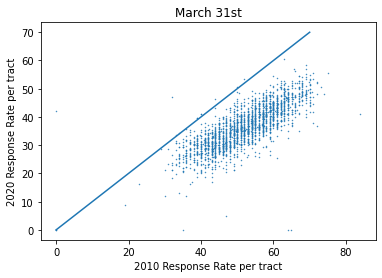

In [186]:
fig , ax = plt.subplots()
ax.scatter(   resp_rates.join(merged,how='inner').RESP_RATE, resp_rates.join(merged,how='inner').CRRALL , s=0.2)
ax.plot([0,70],[0,70])
ax.set_xlabel('2010 Response Rate per tract')
ax.set_ylabel('2020 Response Rate per tract')
plt.title('March 31st')

In [187]:
all_joined = gp.GeoDataFrame(new_tracts.join(tracts.set_index('GEOID')[['geometry']],how='inner').reset_index().rename(columns={'index':"GEOID"}))

In [188]:
all_joined = all_joined.assign(gid=all_joined.GEOID).set_index('gid')

In [189]:
all_joined.to_file('../public/census_tracts.geojson',driver='GeoJSON')

In [190]:
import json

In [191]:
def addID(feature, id_col="GEOID"):
    feature['id'] = feature['properties'][id_col]
    return feature

def assign_id_file(file):
    with open(file,'r') as f:
        features = json.load(f)
        features['features'] =[ addID(feature,'GEOID') for feature in features['features']]

    with open(file,'w') as f:
        json.dump(features,f)
assign_id_file('../public/census_tracts.geojson')

In [32]:
all_joined['CRRALL'].sort_values().to_csv('loweset_rates.csv')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


## Other boundaries

In [192]:
all_joined = gp.read_file('../public/census_tracts.geojson')

In [193]:
community_districts = gp.read_file('../public/boundaries/cd.geojson')
city_council_districts =gp.read_file('../public/boundaries/cc.geojson')
school_districts = gp.read_file('../public/boundaries/sd.geojson')
ntas = gp.read_file('../public/boundaries/nta.geojson')
congress_assembly_districts = gp.read_file('../public/boundaries/nycongress.geojson')
senate_districts = gp.read_file('../public/boundaries/ss.geojson')
police_precincts = gp.read_file('../public/boundaries/pp.geojson')
noccs = gp.read_file('../ETL/NewData/nocc_boundaries.shp').to_crs({'init':'EPSG:4326'}).dropna(subset=['boro_code'])
state_assembly_districts = gp.read_file('../public/boundaries/sa.geojson').to_crs({'init':'EPSG:4326'})

noccs=noccs.assign(geoid = noccs.boro_code.astype(int).astype(str)  + noccs.NCode.str[1:] )

In [196]:
def generate_boundary_level(boundary,census_tracts,boundary_id):
    
    addative_vars = [
        'total_population', 
        'MRR2010', 
        'MRR20pctthreshold',
        'race_total', 
        'race_white', 
        'race_black',
       'race_native_american', 
        'race_asian', 
        'race_hawaiian', 
        'race_other',
       'race_hispanic', 
        'foreign_born_total', 
        'foreign_born_native',
       'foreign_born_foreign', 
        'own_vs_rent_total', 
        'own_vs_rent_owner',
       'own_vs_rent_rent',
       'internet_total', 
        'internet_subscription', 
        'internet_no_subscription',
       'internet_no_access', 
        'age_total', 
        'age_less_5', 
        'age_6_15',
       'age_16_64', 
        'age_64_over', 
        'median_income', 
        'pc_below_poverty',
       'income_houses_total', 
        'homes_below_poverty',
       'english_total_households',
       'english_english',
       'english_spanish',
       'english_european',
        'english_asian',
        'english_other',
        'bilingual',
        'language_total_pop',
        'Speak only English',
        'Spanish',
       'French (incl. Cajun)', 'Haitian', 'Italian', 'Portuguese', 'German',
       'Yiddish, Pennsylvania Dutch or other West Germanic languages', 'Greek',
       'Russian', 'Polish', 'Serbo-Croatian',
       'Ukrainian or other Slavic languages', 'Armenian',
       'Persian (incl. Farsi, Dari)', 'Gujarati', 'Hindi', 'Urdu', 'Punjabi',
       'Bengali', 'Nepali, Marathi, or other Indic languages',
       'Other Indo-European languages', 'Telugu', 'Tamil',
       'Malayalam, Kannada, or other Dravidian languages',
       'Chinese (incl. Mandarin, Cantonese)', 'Japanese', 'Korean', 'Hmong',
       'Vietnamese', 'Khmer', 'Thai, Lao, or other Tai-Kadai languages',
       'Other languages of Asia', 'Tagalog (incl. Filipino)',
       'Ilocano, Samoan, Hawaiian, or other Austronesian languages', 'Arabic',
       'Hebrew', 'Amharic, Somali, or other Afro-Asiatic languages',
       'Yoruba, Twi, Igbo, or other languages of Western Africa',
       'Swahili or other languages of Central, Eastern, and Southern Africa',
       'Navajo', 'Other Native languages of North America',
       'Other and unspecified languages',
        'resp_2010'
  
  ]

    
    intersection = gp.overlay(census_tracts,boundary).assign(area=lambda x:x.area)
    intersection = (intersection.set_index('GEOID').assign(tract_area = census_tracts.set_index("GEOID").area)
                                   .assign(tract_fraction = lambda x: x.area/x.tract_area))
    
    intersection = intersection.rename(columns={boundary_id:'geoid'})
    
    
    addative = intersection[addative_vars].apply(pd.to_numeric,errors='coerce').apply(lambda x: x * intersection.tract_fraction)
    addative = addative.assign(geoid = intersection.geoid)
    addative = addative.assign(htc_pop = addative.MRR20pctthreshold*addative.total_population)
    addative = addative.assign(CRRALL = intersection.CRRALL,
                               CRRINT = intersection.CRRINT,
                               DRRALL = intersection.DRRALL,
                               DRRINT = intersection.DRRINT,
                               HISTORIC_RESP_RATE = intersection.HISTORIC_RESP_RATE
                              )
    ## Map the response count to other polygons
    addative  =addative.assign(CRRALL =  addative.CRRALL * addative.own_vs_rent_total / 100.0 , 
                               CRRINT = addative.CRRINT * addative.own_vs_rent_total /100.0, 
                               DRRALL = addative.DRRALL * addative.own_vs_rent_total/100.0, 
                               DRRINT  = addative.DRRINT * addative.own_vs_rent_total/100.0,
                               HISTORIC_RESP_RATE = intersection.HISTORIC_RESP_RATE *addative.own_vs_rent_total/100.0
                              )
    
    addative = addative.groupby('geoid').sum()
    
    addative = addative.assign(
                               CRRALL =  addative.CRRALL*100 / addative.own_vs_rent_total , 
                               CRRINT = addative.CRRINT *100 / addative.own_vs_rent_total, 
                               DRRALL = addative.DRRALL*100 / addative.own_vs_rent_total, 
                               DRRINT  = addative.DRRINT *100 /  addative.own_vs_rent_total,
                               HISTORIC_RESP_RATE = addative.HISTORIC_RESP_RATE*100/addative.own_vs_rent_total
    )
    
    addative = gp.GeoDataFrame(addative.join(boundary.rename(columns={boundary_id:'geoid'}).set_index('geoid')[['geometry']]))
    addative = addative.reset_index()
    return addative

In [197]:
community_districts_with_vars = generate_boundary_level(community_districts,all_joined,'boro_cd')
city_council_district_with_vars = generate_boundary_level(city_council_districts,all_joined,'coun_dist')
school_districts_with_vars = generate_boundary_level(school_districts,all_joined,'school_dist')
ntas_with_vars = generate_boundary_level(ntas,all_joined,'ntacode')
congress_assembly_districts_with_vars = generate_boundary_level(congress_assembly_districts,all_joined,'cong_dist')
senate_districts_with_vars = generate_boundary_level(senate_districts,all_joined,'st_sen_dist')
police_precincts_with_vars = generate_boundary_level(police_precincts,all_joined,'precinct')
noccs_with_vars = generate_boundary_level(noccs,all_joined,'geoid')
noccs_with_vars = noccs_with_vars.set_index('geoid').assign(neighborhood= noccs.set_index('geoid').Neighborho, nocc_id= noccs.set_index('geoid').NCode).reset_index()
state_assembly_districts_with_vars = generate_boundary_level(state_assembly_districts,all_joined,'assem_dist')
# columns=['geoid','geometry', 'total_population', 'MRR2010', 'MRR20pctthreshold',
#        'race_total', 'race_white', 'race_black', 'race_native_american',
#        'race_asian', 'race_hawaiian', 'race_other', 'race_hispanic',
#        'foreign_born_total', 'foreign_born_native', 'foreign_born_foreign',
#        'own_vs_rent_total', 'own_vs_rent_owner', 'own_vs_rent_rent',
#        'internet_total', 'internet_subscription', 'internet_no_subscription',
#        'internet_no_access', 'age_total', 'age_less_5', 'age_6_15',
#        'age_16_64', 'age_64_over', 'median_income', 'pc_below_poverty',
#        'income_houses_total', 'homes_below_poverty',
# #        'english_total_households', 'english_total_households',
# #        'english_english', 'english_spanish', 'english_european',
# #        'english_asian', 'english_other', 'bilingual', 'htc_pop'
#         ]

community_districts_with_vars.to_file('../public/boundaries/community_districts_vars.geojson',driver='GeoJSON')
city_council_district_with_vars.to_file('../public/boundaries/city_council_district_with_vars.geojson',driver='GeoJSON')
school_districts_with_vars.to_file('../public/boundaries/school_districts_with_vars.geojson',driver='GeoJSON')
ntas_with_vars.to_file('../public/boundaries/ntas_with_vars.geojson',driver='GeoJSON')
congress_assembly_districts_with_vars.to_file('../public/boundaries/congress_assembly_with_vars.geojson',driver='GeoJSON')
senate_districts_with_vars.to_file('../public/boundaries/senate_districts_with_vars.geojson',driver='GeoJSON')
police_precincts_with_vars.to_file('../public/boundaries/police_precincts_with_vars.geojson', driver='GeoJSON')
noccs_with_vars.to_file('../public/boundaries/noccs_with_vars.geojson',driver='GeoJSON')
state_assembly_districts_with_vars.to_file('../public/boundaries/state_assembly_districts_with_vars.geojson',driver='GeoJSON')


/home/jovyan/.local/lib/python3.7/site-packages/geopandas/base.py:48: UserWarning: GeoSeries crs mismatch: epsg:4326 and +init=epsg:4326 +type=crs
  warn("GeoSeries crs mismatch: {0} and {1}".format(this.crs, other.crs))
/home/jovyan/.local/lib/python3.7/site-packages/geopandas/base.py:48: UserWarning: GeoSeries crs mismatch: epsg:4326 and +init=epsg:4326 +type=crs
  warn("GeoSeries crs mismatch: {0} and {1}".format(this.crs, other.crs))


In [89]:
noccs_with_vars.set_index('nocc_id').CRRALL.sort_values().to_csv('noccs_ordered.csv')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [90]:
def generate_labels(boundary,id_col, how='rep'):
    result = boundary.rename(columns={id_col:'geoid'}) 
    if(how=='centroid'):
        result = result.assign(geometry=result.geometry.centroid)
    else:
        result = result.assign(geometry=result.representative_point())
    return result

In [91]:
community_district_labels = generate_labels(community_districts,'boro_cd')
city_council_district_labels = generate_labels(city_council_districts,'coun_dist')
school_district_labels = generate_labels(school_districts,'school_dist')
nta_labels = generate_labels(ntas,'ntacode')
congress_assembly_district_labels = generate_labels(congress_assembly_districts,'cong_dist')
senate_districts_labels = generate_labels(senate_districts,'st_sen_dist')
police_precincts_labels = generate_labels(police_precincts,'precinct', how='centroid')
noccs_labels = generate_labels(noccs,'NCode')
state_assembly_district_labels = generate_labels(state_assembly_districts,'assem_dist')

community_district_labels.to_file('../public/boundaries/communty_district_labels.geojson',driver='GeoJSON')
city_council_district_labels.to_file('../public/boundaries/city_council_district_labels.geojson',driver='GeoJSON')
school_district_labels.to_file('../public/boundaries/school_district_labels.geojson',driver='GeoJSON')
nta_labels.to_file('../public/boundaries/nta_labels.geojson',driver='GeoJSON')
congress_assembly_district_labels.to_file('../public/boundaries/congress_assembly_district_labels.geojson',driver="GeoJSON")
senate_districts_labels.to_file('../public/boundaries/senate_districts_labels.geojson',driver='GeoJSON')
police_precincts_labels.to_file('../public/boundaries/police_precincts_labels.geojson',driver='GeoJSON')
noccs_labels.to_file('../public/boundaries/noccs_labels.geojson',driver='GeoJSON')
state_assembly_district_labels.to_file('../public/boundaries/state_assembly_districts_labels.geojson', driver='GeoJSON')

In [198]:
import json

def addID(feature, id_col="geoid"):
    feature['id'] = feature['properties'][id_col]
    return feature
def assign_id_file(file):
    with open(file,'r') as f:
        features = json.load(f)
        features['features'] =[ addID(feature,'geoid') for feature in features['features']]

    with open(file,'w') as f:
        json.dump(features,f)
        
        
fids = [
   '../public/boundaries/community_districts_vars.geojson',
    '../public/boundaries/city_council_district_with_vars.geojson',
    '../public/boundaries/school_districts_with_vars.geojson',
    '../public/boundaries/ntas_with_vars.geojson',
    '../public/boundaries/congress_assembly_with_vars.geojson',
    '../public/boundaries/senate_districts_with_vars.geojson',
    '../public/boundaries/police_precincts_with_vars.geojson',
    '../public/boundaries/state_assembly_districts_with_vars.geojson',
    '../public/boundaries/noccs_with_vars.geojson',
 '../public/boundaries/communty_district_labels.geojson',
    '../public/boundaries/city_council_district_labels.geojson',
    '../public/boundaries/school_district_labels.geojson',
    '../public/boundaries/nta_labels.geojson',
    '../public/boundaries/congress_assembly_district_labels.geojson',
    '../public/boundaries/senate_districts_labels.geojson',
    '../public/boundaries/police_precincts_labels.geojson',
    '../public/boundaries/noccs_labels.geojson',
    '../public/boundaries/state_assembly_districts_labels.geojson'
]

for fid in fids:
    assign_id_file(fid)

## Dot layers

In [51]:
!ls NewData/dot_layers

'CityWide Community Schools.dbf'
'CityWide Community Schools.shp'
'CityWide Community Schools.shx'
 CommunityBasedOrganizations_Layer.dbf
 CommunityBasedOrganizations_Layer.shp
 CommunityBasedOrganizations_Layer.shx
 Community_centers_and_community_schools.dbf
 Community_centers_and_community_schools.shp
 Community_centers_and_community_schools.shx
 FaithBasedOrganizations_Layer.dbf
 FaithBasedOrganizations_Layer.shp
 FaithBasedOrganizations_Layer.shx
 Food_kitchens_and_food_pantries.dbf
 Food_kitchens_and_food_pantries.shp
 Food_kitchens_and_food_pantries.shx
 geo_export_2bbb10a2-5a12-43fb-b07b-39dc2873d95c.shp
 HeadStartData.csv
 Homeless_Shelters.csv
 HospitalsandHealthClinics_Layer.dbf
 HospitalsandHealthClinics_Layer.shp
 HospitalsandHealthClinics_Layer.shx
 LGBTQOrganizations_Layer.dbf
 LGBTQOrganizations_Layer.shp
 LGBTQOrganizations_Layer.shx
 MentalHealthOrganizations_Layer.dbf
 MentalHealthOrganizations_Layer.shp
 MentalHealthOrganizations_Layer.shx
 PUBLIC_K12.dbf
 PUBLIC_K1

In [52]:
dot_layer_path = Path('NewData/dot_layers/')

In [53]:
dot_layers = {
    "HospitalsandHealthClinics_Layer":{
        "lname":"Hospitals and Rehab Centers",
        "address_cols":['Number', 'Street','City','State','Zip'],
        'name_col':'Facility_N',
        'type': 'Hospitals and Health Clinics',
        'icon':'Dot_Hospitals.png'
    },
    "FaithBasedOrganizations_Layer":{
     "lname" : "Faith-Based Organizations",
     "name_col" : "Partner",
     'type':'Faith Based Organizations',
     'icon': 'Dot_FBO.png',
     "address_cols" : [ 'Street', 'City',
       'State', 'Zip']
    },
    "CityWide Community Schools":
    { 
        "lname":"City Wide Community Schools",
        "name_col":"facname",
        "type":'Community Schools',
        "address_cols":['address','boro','zipcode'],
        'icon':'Dot_CommunitySchools.png'
    },
    
    "LGBTQOrganizations_Layer":{
        "lname": "LGBTQ Centers and Services", 
        "address_cols":['Street','City','State','Zip'], 
        'name_col':'Organizati',
        'type':"LGBTQ",
        'icon': 'Dot_LGBTQ.png'
    },
    
    "Food_kitchens_and_food_pantries":{
        "lname": "Food Kitchens and Pantries",
        "address_cols":['address','city','zipcode'],
        "type" :'Food Kitches and Pantries',
        'name_col':'facname',
        'icon':'Dot_FoodKitchens.png'
    },
    
    "Senior_Centers":{
        "lname": "Senior Centers",
        "address_cols":['address','city','zipcode'], 
        'type':'Senior Centers',
        'name_col': 'facname',
        'icon':'Dot_SeniorCenters.png'
    },
    
    "Universal_PreK":{
        "lname":"Universal Pre-K",
        "address_cols":['address','city','zipcode'],
        "type":'Universal Pre K',
        "name_col":'facname',
        "icon":'Dot_UniPreK.png'
    },

    "PUBLIC_K12": {
        "lname": "K-12 (NYC Public Schools)",
        "address_cols":['address','city','zipcode'],
        "type":"Public K12",
        "name_col":'facname',
        'icon':'Dot_K12.png'
    },
    
    "Community_centers_and_community_schools":{
        "lname": "Community Schools",
        "address_cols":['address','city','zipcode'],
        "name_col":'opname',
        'type': 'Community centers and schools',
        'icon':'Dot_CommunityCenters.png'
    },
    
    "MentalHealthOrganizations_Layer":{
        "lname": "Mental Health Services",
        "address_cols":['street_1','city','zip'],'name_col':'name_1',
        'type':'Mental Health Orgs',
        'name_col':'name_1',
        'icon':'Dot_MentalHealth.png'
    },
    
    "CommunityBasedOrganizations_Layer":{
        "lname":"Community-Based Organizations",
        "address_cols":['Street','City','Zip_1'], 
        'name_col' : 'Partner',
        'type': 'Community Based Organizations',
        'icon':'Dot_CBO.png'
    },
    
    "Public_Libraries":{
        "lname":"Public Libraries",
        "address_cols":['address','city','zipcode'], 
        'name_col':'facname',
        'type':'Libraries',
        'icon':'Dot_Libraries.png'
    }
}

In [124]:
[ {layer['lname']:  layer['icon']} for key, layer in dot_layers.items()]

[{'Hospitals and Rehab Centers': 'Dot_Hospitals.png'},
 {'Faith-Based Organizations': 'Dot_FBO.png'},
 {'City Wide Community Schools': 'Dot_CommunitySchools.png'},
 {'LGBTQ Centers and Services': 'Dot_LGBTQ.png'},
 {'Food Kitchens and Pantries': 'Dot_FoodKitchens.png'},
 {'Senior Centers': 'Dot_SeniorCenters.png'},
 {'Universal Pre-K': 'Dot_UniPreK.png'},
 {'K-12 (NYC Public Schools)': 'Dot_K12.png'},
 {'Community Schools': 'Dot_CommunityCenters.png'},
 {'Mental Health Services': 'Dot_MentalHealth.png'},
 {'Community-Based Organizations': 'Dot_CBO.png'},
 {'Public Libraries': 'Dot_Libraries.png'}]

In [40]:
tracts = gp.read_file('../public/census_tracts.geojson')

In [42]:
police_precincts.head()

,precinct,shape_area,shape_leng,geometry
0,1,47314724.6545,80797.2487935,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ..."
1,5,18088797.9526,18676.1242594,"MULTIPOLYGON (((-73.98864 40.72293, -73.98869 ..."
2,6,22098189.8026,26402.9006691,"MULTIPOLYGON (((-73.99968 40.73855, -73.99684 ..."
3,71,45331787.1744,29978.0942611,"MULTIPOLYGON (((-73.92854 40.66457, -73.92872 ..."
4,72,104621257.743,87968.1945199,"MULTIPOLYGON (((-73.99841 40.67187, -73.99830 ..."


In [80]:
def join_address(x,cols):
    return ",".join([str(x[col]) for col in cols])

all_point_data = []

for file in dot_layers.keys():
    df = gp.read_file( dot_layer_path / (file + '.shp'))
    meta = dot_layers[file]
    df = df.rename(columns={meta['name_col']:'name'}).assign(poi_type =meta['type'])
    df = df.assign(address=df.apply(lambda x: join_address(x,meta['address_cols']),axis=1))
    df = df.assign(asset_type = meta['lname'], icon=meta['icon'])
    all_point_data.append(df[['name','asset_type','address','geometry','icon']])
    


In [81]:
head_start = pd.read_csv(dot_layer_path/'HeadStartData.csv')
head_start = head_start.assign(geometry = head_start.apply(lambda x: Point(x.longitude, x.latitude),axis=1))
head_start = head_start.assign(asset_type='Head Start and Early Head Start', 
                               icon='Dot_HeadStart.png', 
                               address = head_start.apply(lambda x: ','.join([x.addressLineOne, x.city, str(x.zipFive)]),axis=1))
head_stsart = gp.GeoDataFrame(head_start[['name','asset_type','address','geometry','icon']],crs={"init":'epsg:4326'})
all_point_data.append(head_start)

In [82]:
pois = gp.GeoDataFrame(pd.concat(all_point_data))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [83]:
pois = gp.sjoin( pois, tracts[['GEOID','geometry']], op='within',how='inner').rename(columns={"GEOID":'census_tract_id'}).drop('index_right',axis=1)
pois = gp.sjoin( pois, community_districts[['boro_cd','geometry']], op='within',how='inner').rename(columns={"boro_cd":'community_district_id'}).drop('index_right',axis=1)
pois = gp.sjoin( pois, city_council_districts[['coun_dist','geometry']], op='within',how='inner').rename(columns={"coun_dist":'city_council_district_id'}).drop('index_right',axis=1)
pois = gp.sjoin( pois, school_districts[['school_dist','geometry']], op='within',how='inner').rename(columns={"school_dist":'school_district_id'}).drop('index_right',axis=1)
pois = gp.sjoin( pois, ntas[['ntacode','geometry']], op='within',how='inner').rename(columns={"ntacode":'ntaid'}).drop('index_right',axis=1)
pois = gp.sjoin( pois, noccs[['geoid','geometry']], op='within',how='inner').rename(columns={"geoid":'noccs_id'}).drop('index_right',axis=1)
pois = gp.sjoin( pois, congress_assembly_districts[['cong_dist','geometry']], op='within',how='inner').rename(columns={"cong_dist":'cong_dist_id'}).drop('index_right',axis=1)
pois = gp.sjoin( pois, senate_districts[['st_sen_dist','geometry']], op='within',how='inner').rename(columns={"st_sen_dist":'st_sen_dist_id'}).drop('index_right',axis=1)
pois = gp.sjoin( pois, police_precincts[['precinct','geometry']], op='within',how='inner').rename(columns={"precinct":'precinct_id'}).drop('index_right',axis=1)

pois.drop_duplicates().to_file('../public/facilities.geojson',driver='GeoJSON')

/home/jovyan/.local/lib/python3.7/site-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!(None != epsg:4326)
  "(%s != %s)" % (left_df.crs, right_df.crs)
/home/jovyan/.local/lib/python3.7/site-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!(None != epsg:4326)
  "(%s != %s)" % (left_df.crs, right_df.crs)
/home/jovyan/.local/lib/python3.7/site-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!(None != epsg:4326)
  "(%s != %s)" % (left_df.crs, right_df.crs)
/home/jovyan/.local/lib/python3.7/site-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!(None != epsg:4326)
  "(%s != %s)" % (left_df.crs, right_df.crs)
/home/jovyan/.local/lib/python3.7/site-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!(None != epsg:4326)
  "(%s != %s)" % (left_df.crs, right_df.crs)
/home/jovyan/.l

In [84]:
type(pois)

geopandas.geodataframe.GeoDataFrame

In [111]:
file='Senior_Centers'
gp.read_file(dot_layer_path / (file +".shp")).iloc[0]

address                                        37-06 111 Street
addressnum                                                37-06
agencyjuri                                                 None
area                                                       None
areatype                                                   None
bbl                                                  4017780027
bin                                                     4430244
boro                                                     Queens
borocode                                                      4
capacity                                                   None
captype                                                    None
censtract                                                 40100
city                                                     Corona
commboard                                                   403
council                                                      21
datadate                                

In [7]:
all_point_data = []


for layer_name in dot_layers.keys():
    point_data = gp.read_file( dot_layer_path / ( layer_name + '.shp') )
    address_cols = dot_layers[layer_name]['address_cols']
    
    all_point_data.append(point_data.assign(poi_type = dot_layers[layer_name]['lname'],address=point_data.apply(lambda x: join_address(x,meta['', name=""))
all_point_data = pd.concat(all_point_data)


SyntaxError: invalid syntax (<ipython-input-7-c1ab6f15f60b>, line 6)

In [3]:
import geopandas as gp
noccs = gp.read_file('../ETL/NewData/nocc_boundaries.shp').to_crs({'init':'EPSG:4326'}).dropna(subset=['boro_code'])
noccs

,boro_code,NCode,Neighborho,boro,quintile,irr,Type,geometry
0,4.0,Q35,Jamaica Hills,Queens,1,0.51800000000000002,1,"POLYGON ((-73.80484 40.70934, -73.80501 40.709..."
1,4.0,Q36,Kew Gardens,Queens,4,0.66300000000000003,1,"POLYGON ((-73.83063 40.70162, -73.83152 40.701..."
2,4.0,Q37,Kew Gardens Hills,Queens,3,0.63800000000000001,1,"POLYGON ((-73.80784 40.71600, -73.80782 40.715..."
3,4.0,Q38,Laurelton,Queens,2,0.55900000000000005,1,"POLYGON ((-73.75073 40.66640, -73.75176 40.666..."
4,4.0,Q31,Howard Beach,Queens,4,0.66500000000000004,1,"MULTIPOLYGON (((-73.85722 40.65028, -73.85902 ..."
...,...,...,...,...,...,...,...,...
248,1.0,M21,Little Italy,Manhattan,2,0.6,1,"POLYGON ((-73.99543 40.71728, -73.99581 40.716..."
249,1.0,M22,Lower East Side,Manhattan,5,0.69299999999999995,1,"MULTIPOLYGON (((-73.98233 40.70555, -73.98237 ..."
250,1.0,M23,Manhattan Valley,Manhattan,5,0.755,1,"POLYGON ((-73.96371 40.79301, -73.96381 40.792..."
251,3.0,K50,Sheepshead Bay,Brooklyn,2,0.61,1,"POLYGON ((-73.95517 40.58292, -73.95571 40.582..."


In [50]:
print(gp.read_file('EarlyNRFULocations.shp').descriptio.iloc[10])

<html xmlns:fo="http://www.w3.org/1999/XSL/Format" xmlns:msxsl="urn:schemas-microsoft-com:xslt">

<head>

<META http-equiv="Content-Type" content="text/html">

<meta http-equiv="content-type" content="text/html; charset=UTF-8">

</head>

<body style="mar


In [43]:
all_joined = gp.read_file('../public/census_tracts.geojson')

In [45]:
htc_data[ (htc_data.Stusps10=='NY') & (htc_data.Tract10 ==205)]

,GEOID,GEOIDtxt,State,Stusps10,State_name,County10,County_name10,Tract10,MRR2010,MRR20pctthreshold,...,Internet,DialUpOnly,Broadband_Any,Cellular,CellularOnly,Broadband_CableFiberOpticDSL,Broadband_CableFiberOpticDSLOnly,Satellite,SatelliteOnly,OtherOnly
1254,36047020500,36047020500,36,NY,New York,47,Kings County,205.0,75.3,0,...,1243,0,1243,686,52,1147,515,68,26,0
2596,36061020500,36061020500,36,NY,New York,61,New York County,205.0,79.6,0,...,931,10,921,539,27,838,334,8,0,48
2677,36063020500,36063020500,36,NY,New York,63,Niagara County,205.0,69.1,1,...,523,27,496,253,76,420,236,20,0,0
3067,36075020500,36075020500,36,NY,New York,75,Oswego County,205.0,80.0,0,...,1614,16,1598,961,260,1166,551,202,48,4
3285,36081020500,36081020500,36,NY,New York,81,Queens County,205.0,65.6,1,...,268,0,268,99,33,225,159,10,10,0
4095,36093020500,36093020500,36,NY,New York,93,Schenectady County,205.0,79.4,0,...,1725,12,1713,946,43,1670,736,9,0,0
4539,36107020500,36107020500,36,NY,New York,107,Tioga County,205.0,87.9,0,...,1265,7,1258,761,86,1148,466,31,24,0
4658,36117020500,36117020500,36,NY,New York,117,Wayne County,205.0,84.9,0,...,1325,0,1325,669,125,1150,630,82,9,0


In [47]:
all_joined[all_joined['GEOID']==36047020500]

,gid,GEOID,total_population,MRR2010,MRR20pctthreshold,strategy_code,race_total,race_white,race_black,race_native_american,...,cognative_difficulty,ambulatory_difficulty,self_care_difficulty,independent_living_difficulty,CRRALL,CRRINT,DRRALL,DRRINT,HISTORIC_RESP_RATE,geometry
687,36047020500,36047020500,2918,75.3,0,0,2918,1456,729,14,...,2219,2219,2219,2219,41.8,41.6,0.7,0.7,49.0,"MULTIPOLYGON (((-73.96223 40.67817, -73.96255 ..."


In [49]:
import json
with open('../public/census_tracts.geojson') as f:
    data = json.load(f)

In [57]:
htc_data[htc_data.Tract10==205]

,GEOID,GEOIDtxt,State,Stusps10,State_name,County10,County_name10,Tract10,MRR2010,MRR20pctthreshold,...,Internet,DialUpOnly,Broadband_Any,Cellular,CellularOnly,Broadband_CableFiberOpticDSL,Broadband_CableFiberOpticDSLOnly,Satellite,SatelliteOnly,OtherOnly
1254,36047020500,36047020500,36,NY,New York,47,Kings County,205.0,75.3,0,...,1243,0,1243,686,52,1147,515,68,26,0
2596,36061020500,36061020500,36,NY,New York,61,New York County,205.0,79.6,0,...,931,10,921,539,27,838,334,8,0,48
2677,36063020500,36063020500,36,NY,New York,63,Niagara County,205.0,69.1,1,...,523,27,496,253,76,420,236,20,0,0
3067,36075020500,36075020500,36,NY,New York,75,Oswego County,205.0,80.0,0,...,1614,16,1598,961,260,1166,551,202,48,4
3285,36081020500,36081020500,36,NY,New York,81,Queens County,205.0,65.6,1,...,268,0,268,99,33,225,159,10,10,0
4095,36093020500,36093020500,36,NY,New York,93,Schenectady County,205.0,79.4,0,...,1725,12,1713,946,43,1670,736,9,0,0
4539,36107020500,36107020500,36,NY,New York,107,Tioga County,205.0,87.9,0,...,1265,7,1258,761,86,1148,466,31,24,0
4658,36117020500,36117020500,36,NY,New York,117,Wayne County,205.0,84.9,0,...,1325,0,1325,669,125,1150,630,82,9,0


In [58]:
[f for f in data['features'] if f['id'] == 36047020500]

[{'type': 'Feature',
  'properties': {'gid': 36047020500,
   'GEOID': 36047020500,
   'total_population': 2918,
   'MRR2010': 75.3,
   'MRR20pctthreshold': 0,
   'strategy_code': 0,
   'race_total': 2918,
   'race_white': 1456,
   'race_black': 729,
   'race_native_american': 14,
   'race_asian': 377,
   'race_hawaiian': 0,
   'race_other': 36,
   'race_hispanic': 69,
   'language_total_pop': 2907.0,
   'Total 5+': 2700.0,
   'Speak only English': 2155.0,
   'Speak a Language Other than English at Home': 455.0,
   'Spanish': 180.0,
   'French (incl. Cajun)': 110.0,
   'Haitian': 0.0,
   'Italian': 40.0,
   'Portuguese': 0.0,
   'German': 30.0,
   'Yiddish, Pennsylvania Dutch or other West Germanic languages': 0.0,
   'Greek': 0.0,
   'Russian': 0.0,
   'Polish': 0.0,
   'Serbo-Croatian': 0.0,
   'Ukrainian or other Slavic languages': 0.0,
   'Armenian': 0.0,
   'Persian (incl. Farsi, Dari)': 0.0,
   'Gujarati': 0.0,
   'Hindi': 0.0,
   'Urdu': 0.0,
   'Punjabi': 0.0,
   'Bengali': 55.0